In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_11_dlogN_.25_.25_.175_.02_.02_.02_.02_.02_.1_.125',
                          'wgt_1_.85_.7_.6_.5_.5_.5_.5_.5_.4_.4',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_11_dlogN_.25_.25_.175_.02_.02_.02_.02_.02_.1_.125',
                               'wgt_1_.85_.7_.6_.5_.5_.5_.5_.5_.4_.4',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [14]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 11 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [15]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [16]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [17]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [18]:
fig.display_hrefanchor()

In [19]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [20]:
table_dgdgs.display_hrefanchor()

In [5]:
for g in range(1, 11 + 1):
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [21]:
for g in range(1, 11 + 1):
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

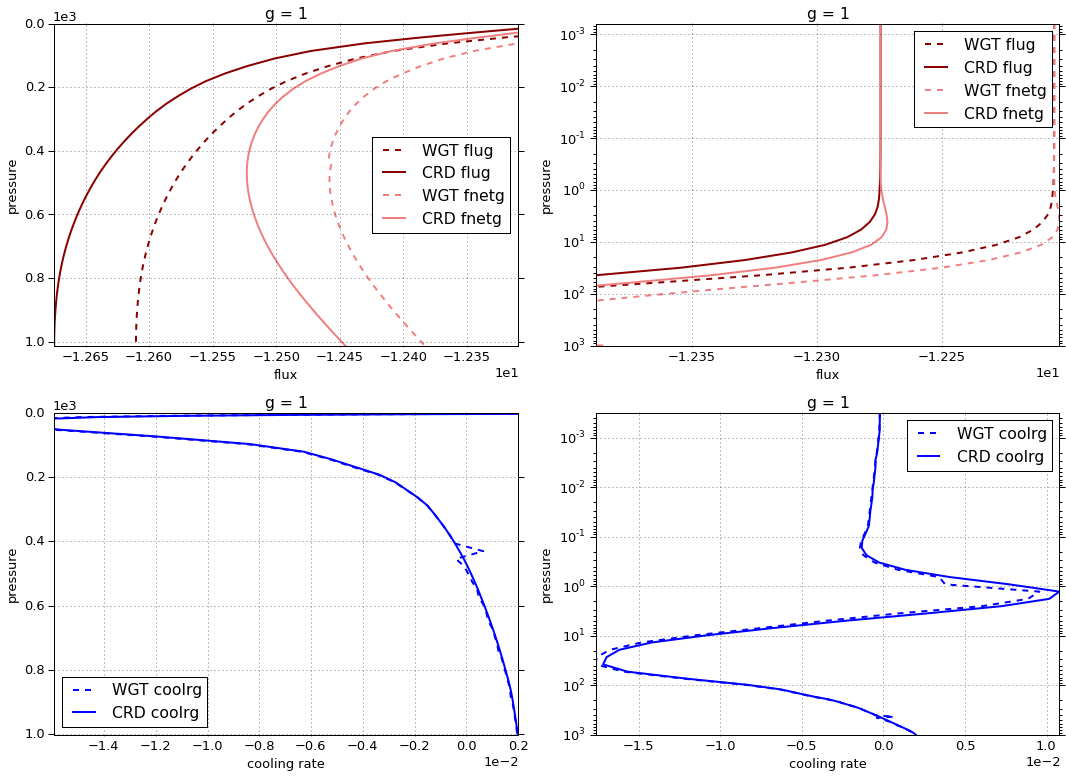

# Figure: flux, cooling rate. g-group 2

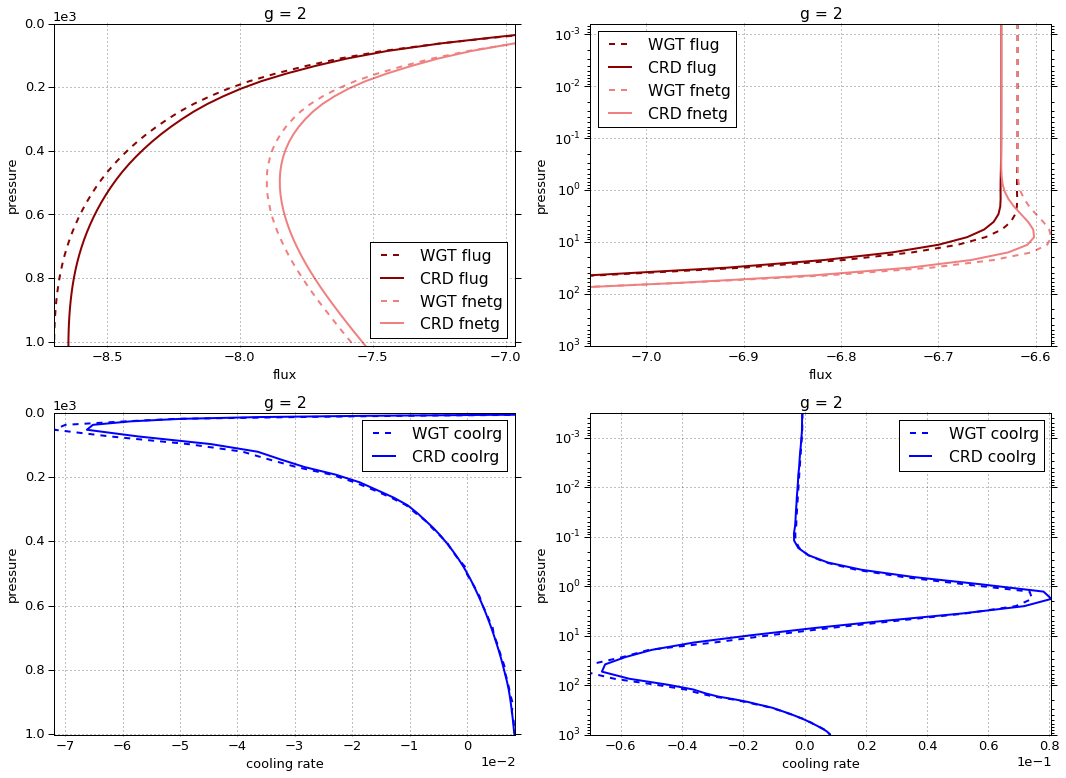

# Figure: flux, cooling rate. g-group 3

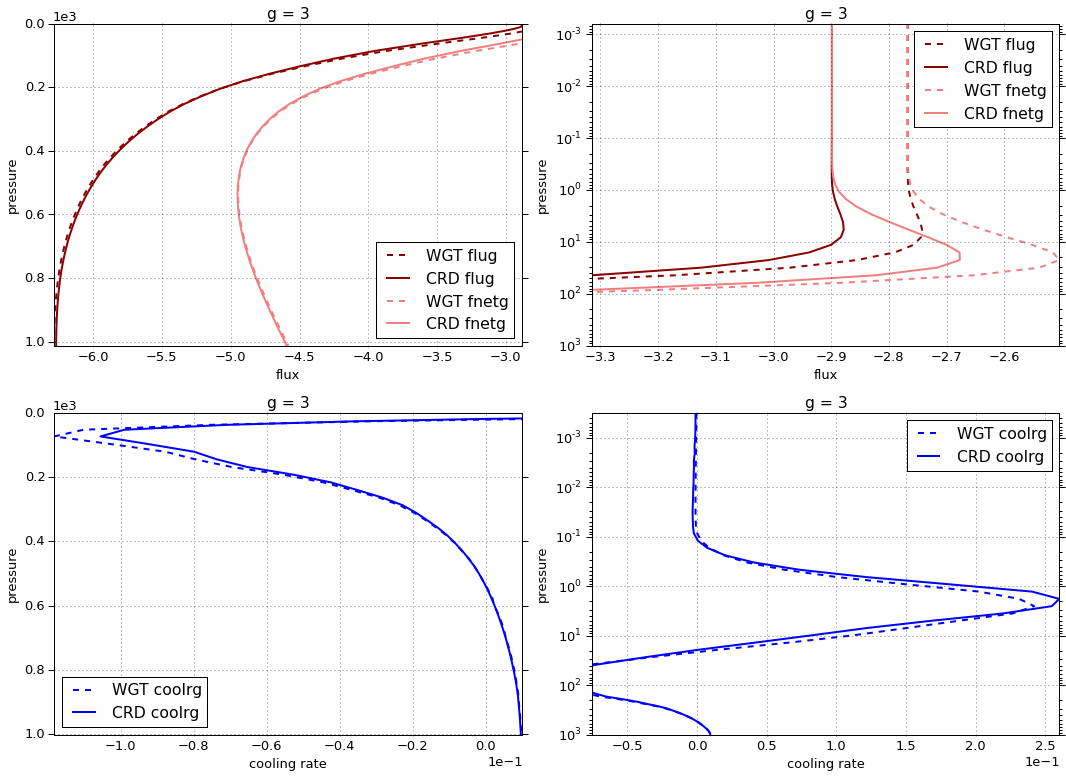

# Figure: flux, cooling rate. g-group 4

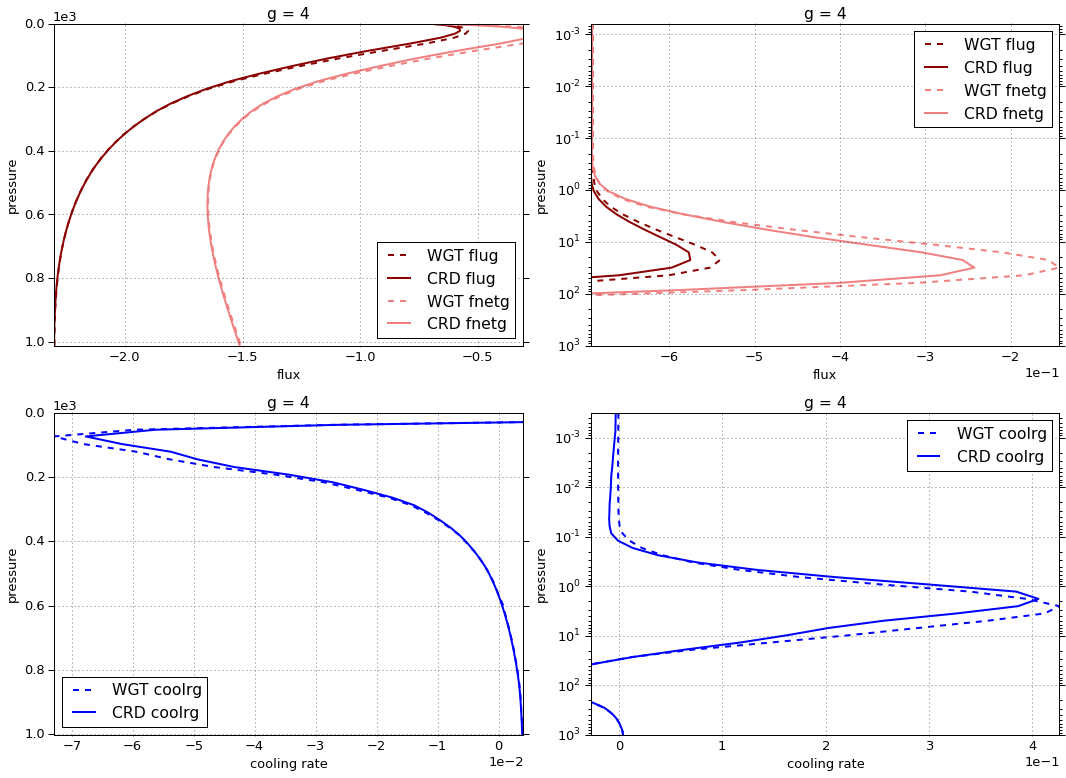

# Figure: flux, cooling rate. g-group 5

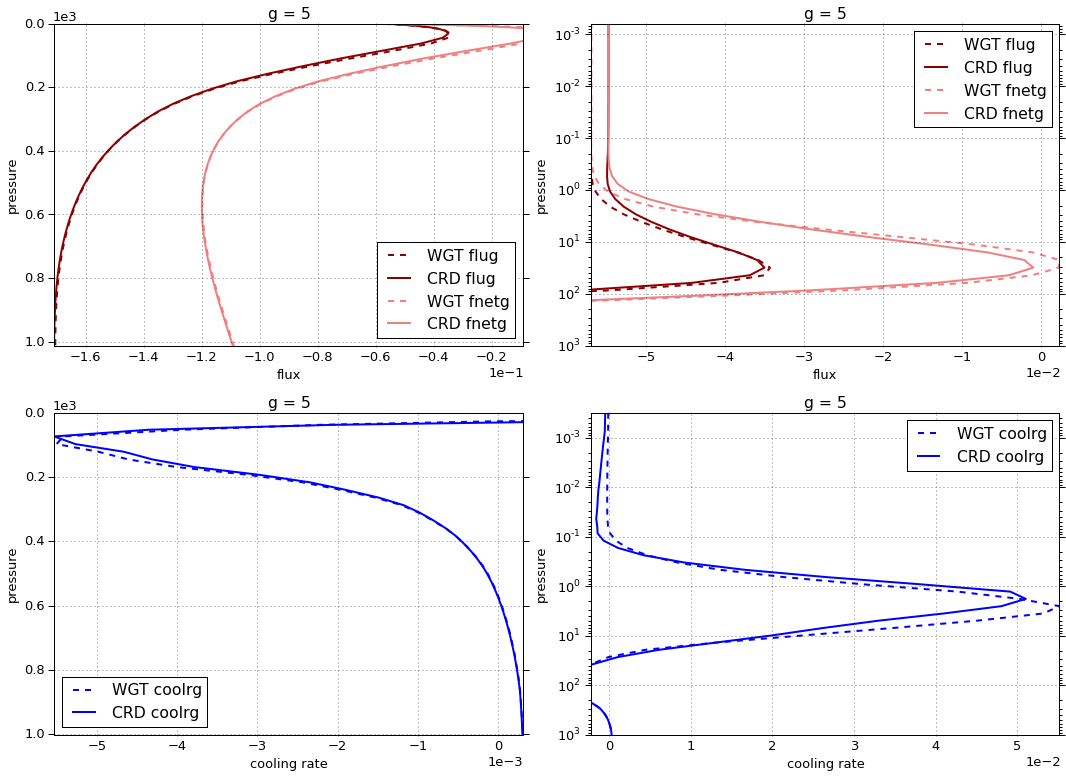

# Figure: flux, cooling rate. g-group 6

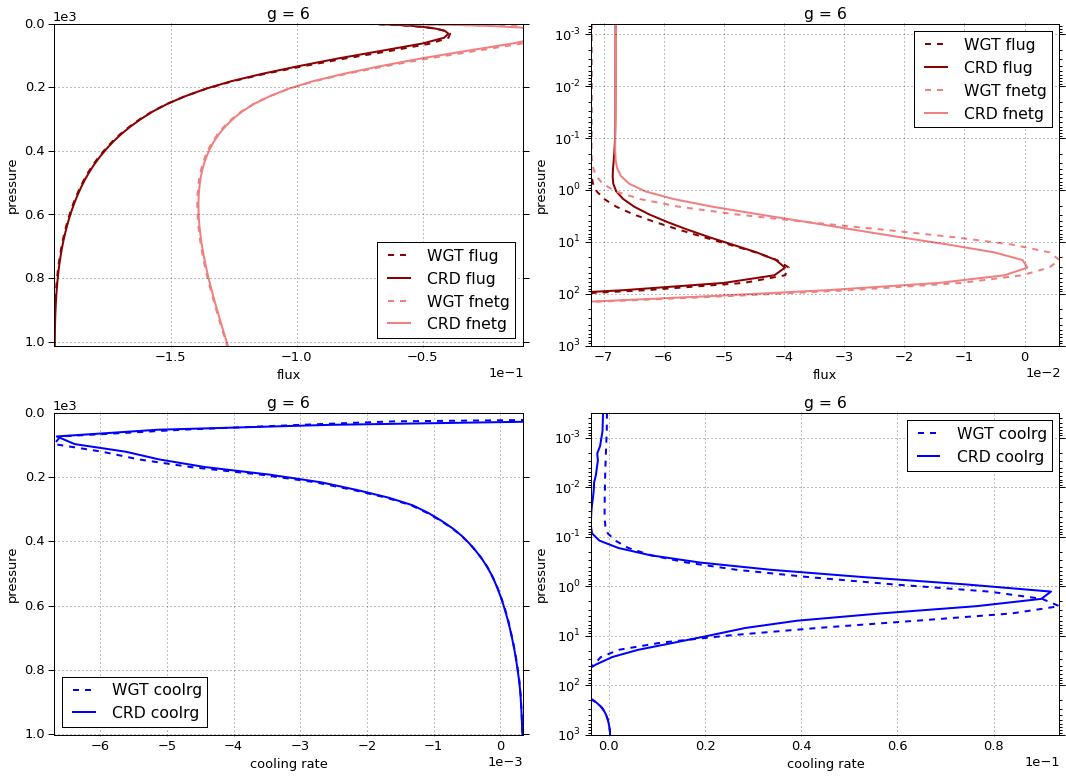

# Figure: flux, cooling rate. g-group 7

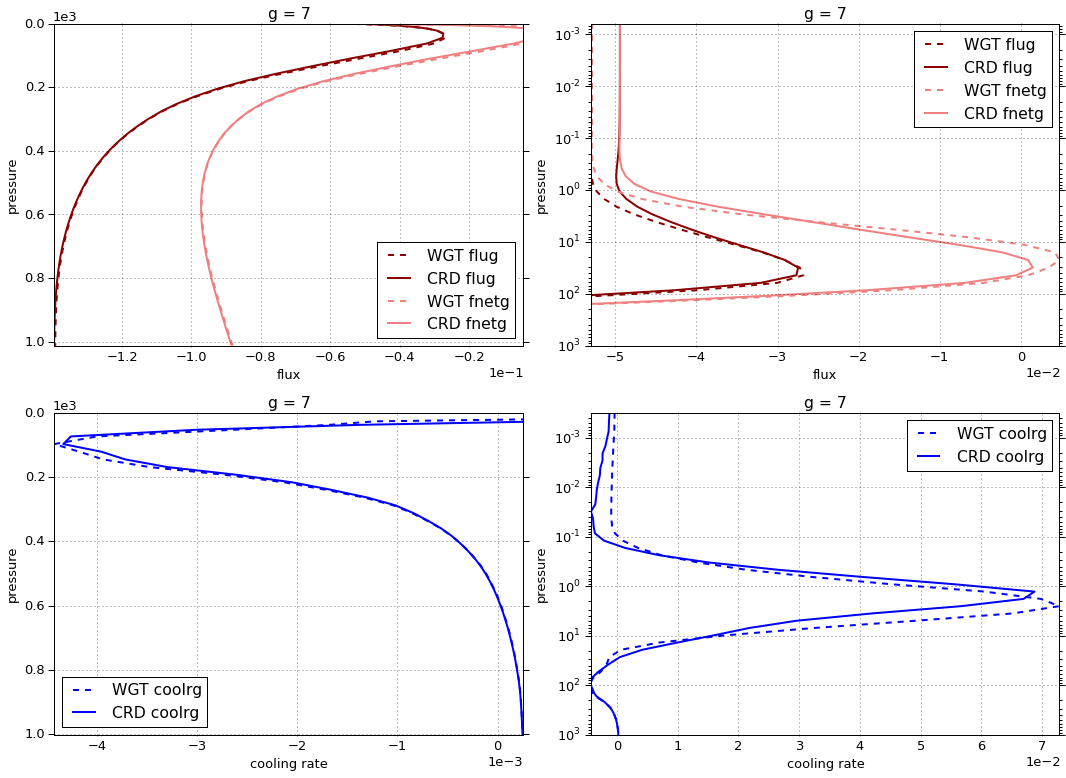

# Figure: flux, cooling rate. g-group 8

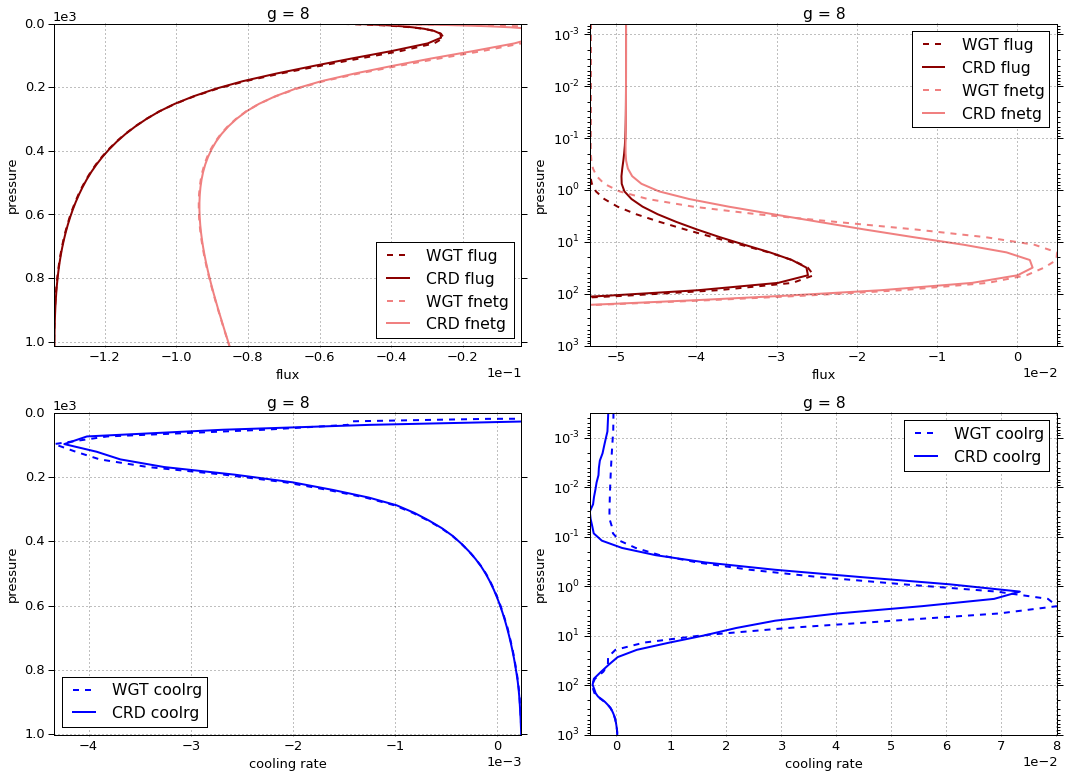

# Figure: flux, cooling rate. g-group 9

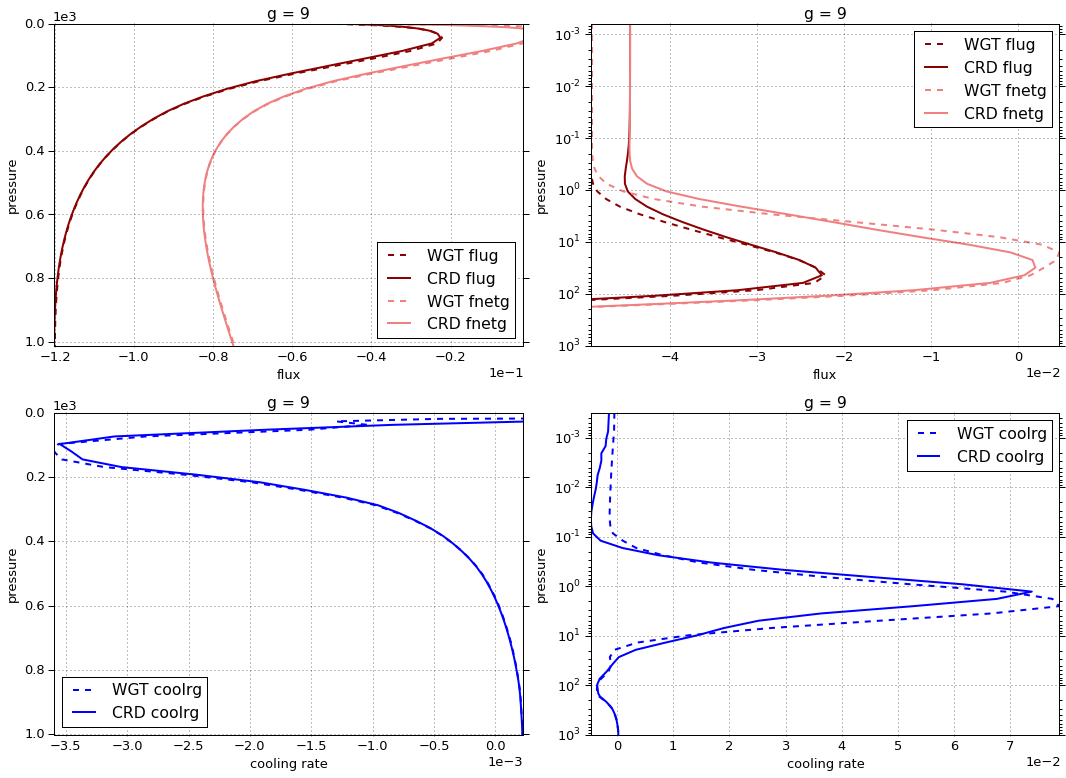

# Figure: flux, cooling rate. g-group 10

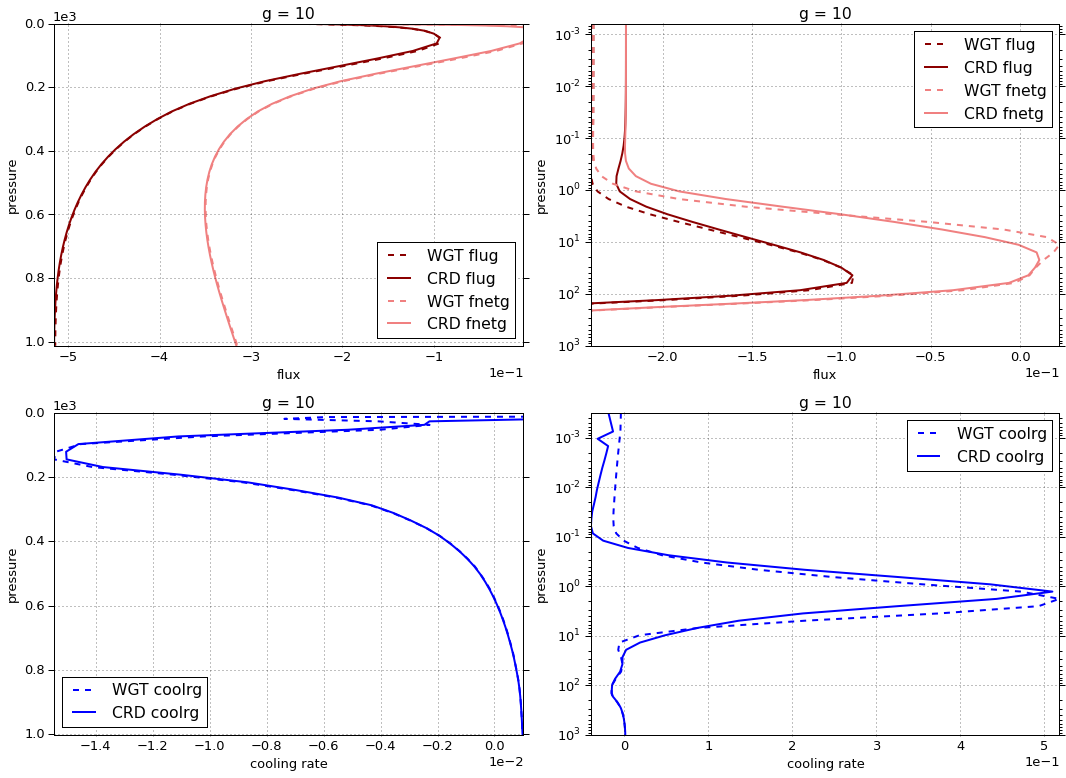

# Figure: flux, cooling rate. g-group 11

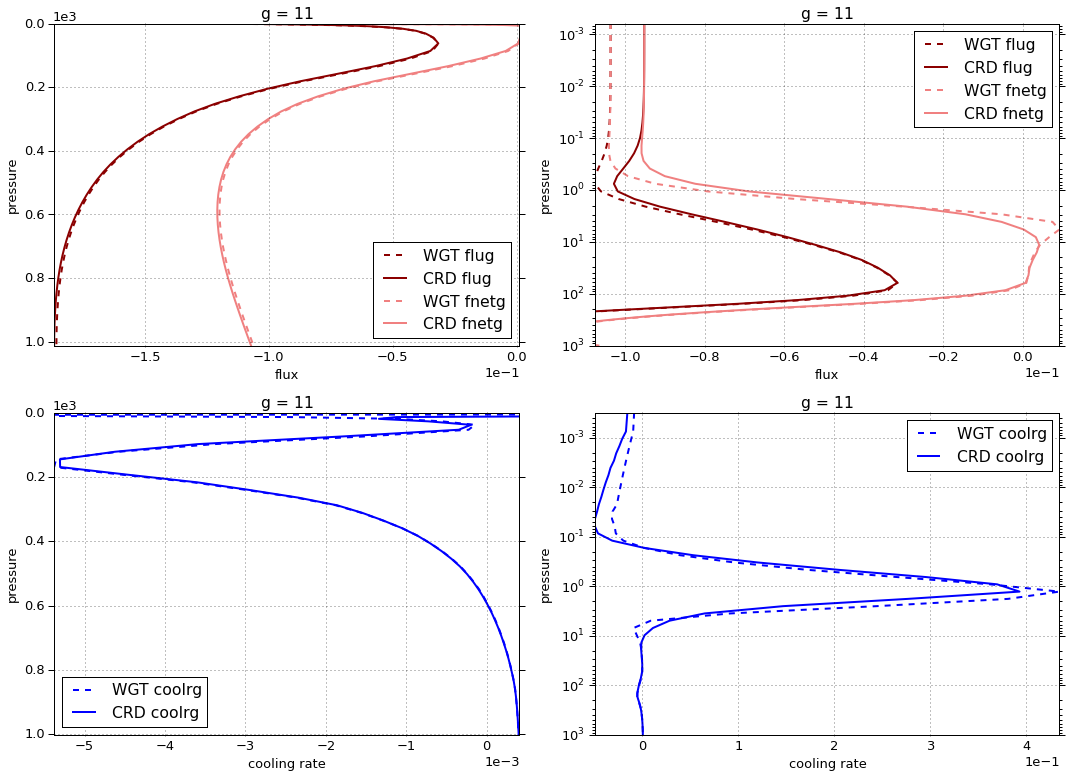

# Figure: flux, cooling rate. g-group total

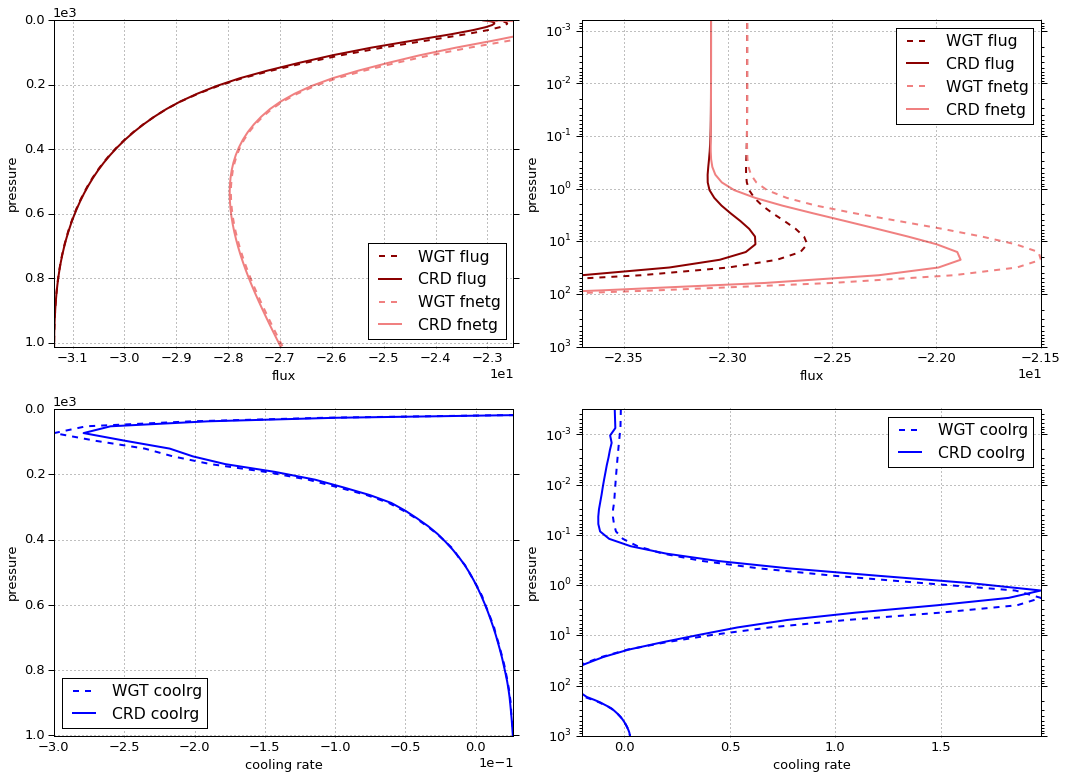

In [22]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [23]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.274527  0.000000 -12.274527
   1013     76    -12.674908  0.229195 -12.445712
2  0        1      -6.635504  0.000000  -6.635504
   1013     76     -8.646580  1.118645  -7.527935
3  0        1      -2.898934  0.000000  -2.898934
   1013     76     -6.269207  1.676264  -4.592942
4  0        1      -0.690935  0.000000  -0.690935
   1013     76     -2.301027  0.789364  -1.511663
5  0        1      -0.054783  0.000000  -0.054783
   1013     76     -0.170849  0.061593  -0.109256
6  0        1      -0.068058  0.000000  -0.068058
   1013     76     -0.196017  0.068657  -0.127360
7  0        1      -0.049441  0.000000  -0.049441
   1013     76     -0.139551  0.051115  -0.088435
8  0        1      -0.048776  0.000000  -0.048776
   1013     76     -0.134004  0.048842  -0.085162
9  0        1      -0.044595  0.000000  -0.044595
   1013     76     -0.120204  0.045314  -0.074890
10 0        1      -0.220544  0.000000  -0.220544
   1013     76     -0.515207  0.199278  -0.315929
11 0        1      -0.095270  0.000000  -0.095270
   1013     76     -0.186683  0.079533  -0.107150


WGT


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.205060  0.000000 -12.205060
   1013     76    -12.610552  0.227502 -12.383049
2  0        1      -6.618770  0.000000  -6.618770
   1013     76     -8.700310  1.129782  -7.570528
3  0        1      -2.767738  0.000000  -2.767738
   1013     76     -6.283752  1.703013  -4.580738
4  0        1      -0.689785  0.000000  -0.689785
   1013     76     -2.299815  0.793527  -1.506288
5  0        1      -0.056983  0.000000  -0.056983
   1013     76     -0.170453  0.061591  -0.108862
6  0        1      -0.072062  0.000000  -0.072062
   1013     76     -0.196272  0.068609  -0.127664
7  0        1      -0.052933  0.000000  -0.052933
   1013     76     -0.139221  0.051102  -0.088119
8  0        1      -0.053183  0.000000  -0.053183
   1013     76     -0.134091  0.048887  -0.085203
9  0        1      -0.048966  0.000000  -0.048966
   1013     76     -0.120008  0.045373  -0.074635
10 0        1      -0.238814  0.000000  -0.238814
   1013     76     -0.514001  0.199179  -0.314823
11 0        1      -0.103746  0.000000  -0.103746
   1013     76     -0.185761  0.079598  -0.106163


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0        1      0.069467  0.000000  0.069467
   1013     76     0.064356 -0.001693  0.062663
2  0        1      0.016734  0.000000  0.016734
   1013     76    -0.053730  0.011137 -0.042593
3  0        1      0.131196  0.000000  0.131196
   1013     76    -0.014545  0.026749  0.012204
4  0        1      0.001150  0.000000  0.001150
   1013     76     0.001212  0.004162  0.005374
5  0        1     -0.002201  0.000000 -0.002201
   1013     76     0.000396 -0.000001  0.000394
6  0        1     -0.004004  0.000000 -0.004004
   1013     76    -0.000256 -0.000048 -0.000304
7  0        1     -0.003492  0.000000 -0.003492
   1013     76     0.000330 -0.000013  0.000317
8  0        1     -0.004408  0.000000 -0.004408
   1013     76    -0.000087  0.000045 -0.000042
9  0        1     -0.004371  0.000000 -0.004371
   1013     76     0.000196  0.000059  0.000255
10 0        1     -0.018270  0.000000 -0.018270
   1013     76     0.001206 -0.000100  0.001106
11 0        1     -0.008476  0.000000 -0.008476
   1013     76     0.000922  0.000065  0.000987

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer          
1  0.000312    1     -0.000213
   1001.112500 75     0.001983
2  0.000312    1     -0.000803
   1001.112500 75     0.008280
3  0.000312    1     -0.001036
   1001.112500 75     0.009587
4  0.000312    1     -0.003103
   1001.112500 75     0.003873
5  0.000312    1     -0.000474
   1001.112500 75     0.000304
6  0.000312    1     -0.001127
   1001.112500 75     0.000328
7  0.000312    1     -0.001217
   1001.112500 75     0.000250
8  0.000312    1     -0.001396
   1001.112500 75     0.000237
9  0.000312    1     -0.001445
   1001.112500 75     0.000221
10 0.000312    1     -0.019095
   1001.112500 75     0.000985
11 0.000312    1     -0.015734
   1001.112500 75     0.000400


WGT


coolrg
g  pressure    layer          
1  0.000312    1     -0.000223
   1001.112500 75     0.001966
2  0.000312    1     -0.000711
   1001.112500 75     0.008410
3  0.000312    1     -0.000460
   1001.112500 75     0.009775
4  0.000312    1     -0.000581
   1001.112500 75     0.003920
5  0.000312    1     -0.000109
   1001.112500 75     0.000305
6  0.000312    1     -0.000323
   1001.112500 75     0.000330
7  0.000312    1     -0.000368
   1001.112500 75     0.000250
8  0.000312    1     -0.000449
   1001.112500 75     0.000238
9  0.000312    1     -0.000486
   1001.112500 75     0.000222
10 0.000312    1     -0.004212
   1001.112500 75     0.000985
11 0.000312    1     -0.008672
   1001.112500 75     0.000399


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.025715e-05
   1001.112500 75    -1.706410e-05
2  0.000312    1      9.159529e-05
   1001.112500 75     1.302769e-04
3  0.000312    1      5.767245e-04
   1001.112500 75     1.874045e-04
4  0.000312    1      2.522297e-03
   1001.112500 75     4.672420e-05
5  0.000312    1      3.653579e-04
   1001.112500 75     1.286610e-06
6  0.000312    1      8.036122e-04
   1001.112500 75     2.169730e-06
7  0.000312    1      8.486282e-04
   1001.112500 75     1.704100e-07
8  0.000312    1      9.471569e-04
   1001.112500 75     1.070320e-06
9  0.000312    1      9.589404e-04
   1001.112500 75     1.051500e-06
10 0.000312    1      1.488299e-02
   1001.112500 75    -2.716000e-08
11 0.000312    1      7.062822e-03
   1001.112500 75    -9.598000e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.081367,0.000000,-23.081367
1013,76,-31.354235,4.367802,-26.986433



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.908042,0.000000,-22.908042
1013,76,-31.354235,4.408164,-26.946071



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.733243e-01,0.000000,0.173324
1013,76,1.500000e-07,0.040362,0.040362


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045645
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.016595
1001.112500,75,0.026800



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.029050
1001.112500,75,0.000352


In [24]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.073208,0.073349
5,0.005458,0.005436
6,0.006208,0.006260
7,0.004458,0.004440
8,0.004250,0.004277
9,0.003833,0.003827


In [25]:
writer = pd.ExcelWriter('results.xlsx')

In [26]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

wgt                                 crd                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.205060  0.000000e+00 -12.205060 -12.274527  0.000000e+00   
0.000624    -12.205060  3.289831e-09 -12.205060 -12.274527  3.367796e-09   
0.000876    -12.205060  4.795557e-09 -12.205060 -12.274527  4.909586e-09   
0.001229    -12.205060  7.412915e-09 -12.205060 -12.274527  7.591089e-09   
0.001723    -12.205060  1.184533e-08 -12.205060 -12.274527  1.213470e-08   
0.002417    -12.205060  1.918336e-08 -12.205060 -12.274527  1.966105e-08   
0.003391    -12.205060  3.112974e-08 -12.205060 -12.274527  3.192088e-08   
0.004757    -12.205060  5.031926e-08 -12.205060 -12.274527  5.162484e-08   
0.006672    -12.205060  8.081079e-08 -12.205060 -12.274528  8.295111e-08   
0.009359    -12.205060  1.288359e-07 -12.205060 -12.274528  1.323180e-07   
0.013128    -12.205061  2.039207e-07 -12.205060 -12.274528  2.095427e-07   
0.018415    -12.205061  3.206048e-07 -12.205061 -12.274529  3.296169e-07   
0.025830    -12.205062  5.009701e-07 -12.205062 -12.274530  5.153210e-07   
0.036232    -12.205063  7.786063e-07 -12.205063 -12.274531  8.013245e-07   
0.050823    -12.205065  1.208000e-06 -12.205064 -12.274533  1.243887e-06   
0.071291    -12.205068  1.926002e-06 -12.205066 -12.274536  1.985078e-06   
0.100000    -12.205074  3.434550e-06 -12.205070 -12.274541  3.549031e-06   
0.140271    -12.205084  7.032262e-06 -12.205077 -12.274551  7.300089e-06   
0.196760    -12.205102  1.540652e-05 -12.205087 -12.274569  1.607600e-05   
0.275997    -12.205132  3.435033e-05 -12.205098 -12.274598  3.601538e-05   
0.387100    -12.205182  7.629937e-05 -12.205105 -12.274646  8.032617e-05   
0.543100    -12.205256  1.677140e-04 -12.205089 -12.274718  1.771443e-04   
0.761700    -12.205363  3.620947e-04 -12.205000 -12.274819  3.833877e-04   
1.068500    -12.205622  7.588051e-04 -12.204863 -12.274960  8.045655e-04   
1.498800    -12.205870  1.494340e-03 -12.204376 -12.275190  1.583847e-03   
2.102400    -12.206399  2.656813e-03 -12.203743 -12.275690  2.809960e-03   
2.949000    -12.207517  4.380667e-03 -12.203137 -12.276769  4.615724e-03   
4.136600    -12.209725  6.718781e-03 -12.203007 -12.278823  7.041668e-03   
5.802500    -12.213345  9.649753e-03 -12.203695 -12.282283  1.004879e-02   
8.139200    -12.219049  1.328127e-02 -12.205768 -12.287833  1.373570e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.544995  9.454851e-02 -12.450446 -12.608299  9.427058e-02   
347.300000  -12.551040  9.764847e-02 -12.453392 -12.614383  9.741363e-02   
371.075000  -12.556599  1.008925e-01 -12.455706 -12.619985  1.006972e-01   
394.850000  -12.561734  1.042756e-01 -12.457458 -12.625168  1.041251e-01   
418.625000  -12.566521  1.078242e-01 -12.458697 -12.630007  1.077285e-01   
442.400000  -12.570956  1.140960e-01 -12.456860 -12.634495  1.114698e-01   
466.175000  -12.575039  1.170398e-01 -12.457999 -12.638633  1.153207e-01   
489.950000  -12.578776  1.205469e-01 -12.458229 -12.642425  1.192463e-01   
513.725000  -12.582217  1.242035e-01 -12.458013 -12.645921  1.232654e-01   
537.500000  -12.585405  1.280212e-01 -12.457384 -12.649164  1.274068e-01   
561.275000  -12.588348  1.321370e-01 -12.456211 -12.652161  1.316584e-01   
585.050000  -12.591066  1.362099e-01 -12.454856 -12.654931  1.360160e-01   
608.825000  -12.593573  1.405699e-01 -12.453003 -12.657488  1.404950e-01   
632.600000  -12.595870  1.450335e-01 -12.450837 -12.659834  1.450759e-01   
656.375000  -12.597968  1.494683e-01 -12.448500 -12.661979  1.497579e-01   
680.150000  -12.599875  1.541479e-01 -12.445727 -12.663931  1.545445e-01   
703.925000  -12.601592  1.589171e-01 -12.442675 -12.665690  1.594209e-01   
727.700000  -12.603128  1.637735e-01 -12.439354 -12.667265  1.643830e-01   
751.475000  -12.604490  1.686158e-01 -12.435874 -12.668663  1.69427

In [27]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.618770  0.000000e+00 -6.618770 -6.635504  0.000000e+00   
0.000624    -6.618770  1.711134e-08 -6.618770 -6.635504  1.908943e-08   
0.000876    -6.618771  2.495829e-08 -6.618770 -6.635504  2.782995e-08   
0.001229    -6.618771  3.860330e-08 -6.618771 -6.635504  4.303485e-08   
0.001723    -6.618771  6.171922e-08 -6.618771 -6.635504  6.880457e-08   
0.002417    -6.618771  1.000028e-07 -6.618771 -6.635505  1.115007e-07   
0.003391    -6.618771  1.623528e-07 -6.618771 -6.635505  1.810629e-07   
0.004757    -6.618771  2.625460e-07 -6.618771 -6.635505  2.928825e-07   
0.006672    -6.618772  4.218172e-07 -6.618771 -6.635506  4.706856e-07   
0.009359    -6.618773  6.727886e-07 -6.618772 -6.635507  7.509209e-07   
0.013128    -6.618774  1.065366e-06 -6.618773 -6.635508  1.189341e-06   
0.018415    -6.618776  1.675783e-06 -6.618774 -6.635511  1.871084e-06   
0.025830    -6.618779  2.619935e-06 -6.618777 -6.635514  2.925524e-06   
0.036232    -6.618784  4.074325e-06 -6.618780 -6.635519  4.549549e-06   
0.050823    -6.618791  6.325597e-06 -6.618784 -6.635527  7.062816e-06   
0.071291    -6.618801  1.009296e-05 -6.618791 -6.635539  1.127183e-05   
0.100000    -6.618819  1.800322e-05 -6.618801 -6.635559  2.013757e-05   
0.140271    -6.618852  3.679014e-05 -6.618816 -6.635597  4.128175e-05   
0.196760    -6.618908  8.018484e-05 -6.618828 -6.635660  9.028036e-05   
0.275997    -6.618994  1.772623e-04 -6.618816 -6.635758  2.001172e-04   
0.387100    -6.619114  3.891409e-04 -6.618725 -6.635899  4.399987e-04   
0.543100    -6.619257  8.428230e-04 -6.618414 -6.636068  9.531345e-04   
0.761700    -6.619368  1.788200e-03 -6.617579 -6.636211  2.019233e-03   
1.068500    -6.619363  3.685218e-03 -6.615677 -6.636241  4.145325e-03   
1.498800    -6.619139  7.208413e-03 -6.611930 -6.636163  8.045464e-03   
2.102400    -6.619502  1.288491e-02 -6.606617 -6.636553  1.419988e-02   
2.949000    -6.621203  2.149518e-02 -6.599708 -6.638435  2.327398e-02   
4.136600    -6.625733  3.341971e-02 -6.592313 -6.643341  3.543368e-02   
5.802500    -6.634958  4.862312e-02 -6.586335 -6.653111  5.042134e-02   
8.139200    -6.651688  6.766133e-02 -6.584027 -6.670489  6.870732e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.313907  4.870086e-01 -7.826899 -8.259515  4.809625e-01   
347.300000  -8.352308  5.049534e-01 -7.847354 -8.297377  4.984986e-01   
371.075000  -8.387164  5.228867e-01 -7.864278 -8.331877  5.166552e-01   
394.850000  -8.419002  5.416432e-01 -7.877359 -8.363460  5.354177e-01   
418.625000  -8.448446  5.616564e-01 -7.886789 -8.392635  5.548815e-01   
442.400000  -8.475240  5.813611e-01 -7.893879 -8.419431  5.748555e-01   
466.175000  -8.499799  6.016099e-01 -7.898189 -8.443896  5.951517e-01   
489.950000  -8.521934  6.227317e-01 -7.899202 -8.466107  6.155994e-01   
513.725000  -8.542267  6.430781e-01 -7.899189 -8.486400  6.362930e-01   
537.500000  -8.560811  6.639077e-01 -7.896904 -8.505069  6.573422e-01   
561.275000  -8.577809  6.853502e-01 -7.892459 -8.522178  6.786611e-01   
585.050000  -8.593373  7.072596e-01 -7.886114 -8.537867  7.003014e-01   
608.825000  -8.607639  7.290448e-01 -7.878595 -8.552240  7.222634e-01   
632.600000  -8.620567  7.513500e-01 -7.869218 -8.565331  7.444781e-01   
656.375000  -8.632314  7.740029e-01 -7.858311 -8.577211  7.669401e-01   
680.150000  -8.642870  7.972111e-01 -7.845659 -8.587942  7.896433e-01   
703.925000  -8.652353  8.199762e-01 -7.832377 -8.597551  8.125129e-01   
727.700000  -8.660744  8.431708e-01 -7.817573 -8.606094  8.355306e-01   
751.475000  -8.668147  8.664699e-01 -7.801677 -8.613628  8.587220e-01   
775.250000  -8.674583  8.900748e-01 -7.784509 -8.620193  8.820393e-01   
799.025000  -8.680090  9.139814e-01 -7.766108 -8.625828  9.054141e-01   
822

In [28]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.767738  0.000000e+00 -2.767738 -2.898934  0.000000e+00   
0.000624    -2.767738  3.373536e-08 -2.767738 -2.898934  4.923515e-08   
0.000876    -2.767738  4.922021e-08 -2.767738 -2.898934  7.178690e-08   
0.001229    -2.767738  7.619099e-08 -2.767738 -2.898934  1.110519e-07   
0.001723    -2.767739  1.219611e-07 -2.767738 -2.898935  1.776556e-07   
0.002417    -2.767739  1.978955e-07 -2.767739 -2.898935  2.880967e-07   
0.003391    -2.767739  3.217822e-07 -2.767739 -2.898935  4.681734e-07   
0.004757    -2.767739  5.212167e-07 -2.767739 -2.898936  7.578631e-07   
0.006672    -2.767740  8.388260e-07 -2.767739 -2.898937  1.218835e-06   
0.009359    -2.767741  1.340246e-06 -2.767739 -2.898938  1.945892e-06   
0.013128    -2.767742  2.126139e-06 -2.767740 -2.898941  3.084143e-06   
0.018415    -2.767744  3.350694e-06 -2.767740 -2.898944  4.855330e-06   
0.025830    -2.767747  5.249059e-06 -2.767741 -2.898950  7.596621e-06   
0.036232    -2.767751  8.180638e-06 -2.767743 -2.898958  1.182148e-05   
0.050823    -2.767757  1.273147e-05 -2.767745 -2.898970  1.836359e-05   
0.071291    -2.767767  2.038787e-05 -2.767746 -2.898988  2.933556e-05   
0.100000    -2.767783  3.661864e-05 -2.767746 -2.899018  5.250578e-05   
0.140271    -2.767807  7.551430e-05 -2.767732 -2.899071  1.077642e-04   
0.196760    -2.767839  1.658093e-04 -2.767673 -2.899149  2.352540e-04   
0.275997    -2.767862  3.680482e-04 -2.767494 -2.899244  5.185458e-04   
0.387100    -2.767832  8.084468e-04 -2.767023 -2.899317  1.129091e-03   
0.543100    -2.767607  1.746418e-03 -2.765861 -2.899237  2.411500e-03   
0.761700    -2.766951  3.685528e-03 -2.763265 -2.898700  5.013901e-03   
1.068500    -2.765362  7.552133e-03 -2.757810 -2.897165  1.007018e-02   
1.498800    -2.762284  1.478149e-02 -2.747503 -2.894011  1.916643e-02   
2.102400    -2.757642  2.666461e-02 -2.730977 -2.889521  3.326339e-02   
2.949000    -2.751835  4.512070e-02 -2.706714 -2.884273  5.354466e-02   
4.136600    -2.746123  7.127434e-02 -2.674849 -2.879781  7.994473e-02   
5.802500    -2.742732  1.049865e-01 -2.637746 -2.878405  1.118294e-01   
8.139200    -2.744617  1.485441e-01 -2.596072 -2.883344  1.505597e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.622411  8.596462e-01 -4.762764 -5.606985  8.374123e-01   
347.300000  -5.695291  8.866271e-01 -4.808664 -5.678877  8.645298e-01   
371.075000  -5.760283  9.140929e-01 -4.846190 -5.743184  8.923195e-01   
394.850000  -5.818513  9.423860e-01 -4.876127 -5.801013  9.207911e-01   
418.625000  -5.871298  9.717009e-01 -4.899597 -5.853532  9.498903e-01   
442.400000  -5.918927  1.001044e+00 -4.917883 -5.900994  9.793366e-01   
466.175000  -5.961508  1.030551e+00 -4.930957 -5.943668  1.008887e+00   
489.950000  -5.999676  1.059923e+00 -4.939753 -5.981850  1.038250e+00   
513.725000  -6.033950  1.089221e+00 -4.944729 -6.016253  1.067559e+00   
537.500000  -6.065082  1.118601e+00 -4.946480 -6.047482  1.096979e+00   
561.275000  -6.093103  1.148219e+00 -4.944884 -6.075745  1.126448e+00   
585.050000  -6.118494  1.178403e+00 -4.940091 -6.101355  1.155959e+00   
608.825000  -6.141447  1.207676e+00 -4.933771 -6.124550  1.185544e+00   
632.600000  -6.162106  1.237237e+00 -4.924869 -6.145448  1.215148e+00   
656.375000  -6.180678  1.267147e+00 -4.913531 -6.164218  1.244740e+00   
680.150000  -6.197221  1.297217e+00 -4.900003 -6.181006  1.274331e+00   
703.925000  -6.211879  1.326780e+00 -4.885099 -6.195899  1.303911e+00   
727.700000  -6.224790  1.356371e+00 -4.868419 -6.209018  1.333347e+00   
751.475000  -6.236062  1.385946e+00 -4.850116 -6.220486  1.362735e+00   
775.250000  -6.245777  1.415548e+00 -4.830229 -6.230397  1.392035e+00   
799.025000  -6.254039  1.444898e+00 -4.809141 -6.238837  1.421148e+00   
822

In [29]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.689785  0.000000e+00 -0.689785 -0.690935  0.000000e+00   
0.000624    -0.689785  7.916344e-08 -0.689785 -0.690936  1.331575e-07   
0.000876    -0.689785  1.154489e-07 -0.689785 -0.690936  1.940380e-07   
0.001229    -0.689785  1.784007e-07 -0.689785 -0.690936  2.996259e-07   
0.001723    -0.689786  2.847870e-07 -0.689785 -0.690937  4.779985e-07   
0.002417    -0.689786  4.605514e-07 -0.689785 -0.690937  7.725611e-07   
0.003391    -0.689786  7.461161e-07 -0.689785 -0.690938  1.250879e-06   
0.004757    -0.689787  1.203908e-06 -0.689786 -0.690940  2.017173e-06   
0.006672    -0.689788  1.929927e-06 -0.689786 -0.690943  3.231474e-06   
0.009359    -0.689789  3.071334e-06 -0.689786 -0.690947  5.138644e-06   
0.013128    -0.689791  4.852815e-06 -0.689786 -0.690954  8.111643e-06   
0.018415    -0.689794  7.617011e-06 -0.689787 -0.690964  1.271749e-05   
0.025830    -0.689799  1.188410e-05 -0.689787 -0.690979  1.981355e-05   
0.036232    -0.689806  1.844549e-05 -0.689788 -0.691001  3.069751e-05   
0.050823    -0.689817  2.858434e-05 -0.689788 -0.691034  4.746104e-05   
0.071291    -0.689832  4.542277e-05 -0.689786 -0.691084  7.518613e-05   
0.100000    -0.689855  7.993786e-05 -0.689775 -0.691166  1.317141e-04   
0.140271    -0.689885  1.588873e-04 -0.689726 -0.691298  2.600658e-04   
0.196760    -0.689911  3.338021e-04 -0.689577 -0.691491  5.413988e-04   
0.275997    -0.689889  7.080002e-04 -0.689181 -0.691729  1.133895e-03   
0.387100    -0.689722  1.486970e-03 -0.688235 -0.691932  2.340196e-03   
0.543100    -0.689164  3.074224e-03 -0.686090 -0.691868  4.726085e-03   
0.761700    -0.687776  6.216094e-03 -0.681560 -0.691006  9.264004e-03   
1.068500    -0.684666  1.226522e-02 -0.672400 -0.688436  1.752244e-02   
1.498800    -0.678545  2.346822e-02 -0.655077 -0.682892  3.157363e-02   
2.102400    -0.668849  4.197125e-02 -0.626878 -0.674223  5.192304e-02   
2.949000    -0.654745  7.059923e-02 -0.584145 -0.662051  7.848643e-02   
4.136600    -0.636571  1.103682e-01 -0.526203 -0.646779  1.091833e-01   
5.802500    -0.615709  1.599853e-01 -0.455723 -0.629421  1.424027e-01   
8.139200    -0.593028  2.173596e-01 -0.375668 -0.610709  1.798019e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.963181  4.320898e-01 -1.531091 -1.963172  4.288328e-01   
347.300000  -2.003240  4.446998e-01 -1.558541 -2.002739  4.415902e-01   
371.075000  -2.038379  4.575070e-01 -1.580872 -2.037570  4.545670e-01   
394.850000  -2.069418  4.708994e-01 -1.598518 -2.068428  4.677245e-01   
418.625000  -2.097138  4.840685e-01 -1.613069 -2.096072  4.810733e-01   
442.400000  -2.121769  4.973642e-01 -1.624405 -2.120743  4.944667e-01   
466.175000  -2.143640  5.105846e-01 -1.633056 -2.142668  5.077760e-01   
489.950000  -2.162986  5.236873e-01 -1.639298 -2.162073  5.208974e-01   
513.725000  -2.180162  5.367036e-01 -1.643458 -2.179384  5.338966e-01   
537.500000  -2.195594  5.496872e-01 -1.645907 -2.194951  5.468421e-01   
561.275000  -2.209423  5.624934e-01 -1.646930 -2.208919  5.597082e-01   
585.050000  -2.221795  5.753445e-01 -1.646451 -2.221474  5.725135e-01   
608.825000  -2.232938  5.884559e-01 -1.644482 -2.232762  5.852868e-01   
632.600000  -2.242870  6.011824e-01 -1.641687 -2.242860  5.979899e-01   
656.375000  -2.251733  6.138688e-01 -1.637864 -2.251871  6.106305e-01   
680.150000  -2.259602  6.264437e-01 -1.633158 -2.259881  6.232174e-01   
703.925000  -2.266555  6.389467e-01 -1.627609 -2.266947  6.357078e-01   
727.700000  -2.272608  6.514081e-01 -1.621200 -2.273138  6.481139e-01   
751.475000  -2.277867  6.637633e-01 -1.614104 -2.278523  6.604463e-01   
775.250000  -2.282391  6.760364e-01 -1.606355 -2.283154  6.726991e-01   
799.025000  -2.286226  6.882286e-01 -1.597998 -2.287079  6.848344e-01   
822

In [30]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.056983  0.000000e+00 -0.056983 -0.054783  0.000000e+00   
0.000624    -0.056983  9.014980e-09 -0.056983 -0.054783  1.761832e-08   
0.000876    -0.056983  1.316589e-08 -0.056983 -0.054783  2.567690e-08   
0.001229    -0.056983  2.037634e-08 -0.056983 -0.054783  3.966410e-08   
0.001723    -0.056983  3.257812e-08 -0.056983 -0.054783  6.331299e-08   
0.002417    -0.056983  5.276558e-08 -0.056983 -0.054783  1.023993e-07   
0.003391    -0.056983  8.561350e-08 -0.056983 -0.054783  1.659213e-07   
0.004757    -0.056983  1.383576e-07 -0.056983 -0.054783  2.677717e-07   
0.006672    -0.056984  2.221528e-07 -0.056983 -0.054784  4.293010e-07   
0.009359    -0.056984  3.541473e-07 -0.056983 -0.054784  6.832056e-07   
0.013128    -0.056984  5.606095e-07 -0.056984 -0.054785  1.079330e-06   
0.018415    -0.056985  8.817515e-07 -0.056984 -0.054787  1.693519e-06   
0.025830    -0.056985  1.378901e-06 -0.056984 -0.054789  2.640550e-06   
0.036232    -0.056986  2.145877e-06 -0.056984 -0.054792  4.094282e-06   
0.050823    -0.056988  3.335694e-06 -0.056985 -0.054797  6.335378e-06   
0.071291    -0.056990  5.323508e-06 -0.056985 -0.054805  1.005069e-05   
0.100000    -0.056994  9.437049e-06 -0.056984 -0.054817  1.766503e-05   
0.140271    -0.056999  1.895156e-05 -0.056980 -0.054838  3.505096e-05   
0.196760    -0.057006  4.026392e-05 -0.056965 -0.054869  7.328425e-05   
0.275997    -0.057008  8.636182e-05 -0.056922 -0.054910  1.539124e-04   
0.387100    -0.056995  1.834085e-04 -0.056811 -0.054952  3.178828e-04   
0.543100    -0.056944  3.834639e-04 -0.056561 -0.054968  6.407566e-04   
0.761700    -0.056791  7.841927e-04 -0.056007 -0.054891  1.251095e-03   
1.068500    -0.056440  1.564920e-03 -0.054875 -0.054601  2.349118e-03   
1.498800    -0.055725  3.027598e-03 -0.052698 -0.053931  4.184065e-03   
2.102400    -0.054569  5.469010e-03 -0.049100 -0.052860  6.764888e-03   
2.949000    -0.052863  9.296266e-03 -0.043567 -0.051328  1.005499e-02   
4.136600    -0.050615  1.453750e-02 -0.036078 -0.049353  1.385399e-02   
5.802500    -0.047980  2.079205e-02 -0.027188 -0.047023  1.803371e-02   
8.139200    -0.045011  2.745085e-02 -0.017560 -0.044368  2.263956e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.142855  3.272821e-02 -0.110126 -0.143038  3.281653e-02   
347.300000  -0.146190  3.377782e-02 -0.112412 -0.146351  3.386958e-02   
371.075000  -0.149104  3.484293e-02 -0.114261 -0.149254  3.493511e-02   
394.850000  -0.151665  3.591828e-02 -0.115747 -0.151816  3.600884e-02   
418.625000  -0.153947  3.700461e-02 -0.116942 -0.154104  3.709429e-02   
442.400000  -0.155976  3.809191e-02 -0.117884 -0.156140  3.817918e-02   
466.175000  -0.157765  3.916966e-02 -0.118596 -0.157945  3.925381e-02   
489.950000  -0.159344  4.022727e-02 -0.119117 -0.159538  4.031020e-02   
513.725000  -0.160747  4.127448e-02 -0.119473 -0.160957  4.135373e-02   
537.500000  -0.162007  4.231616e-02 -0.119691 -0.162231  4.239164e-02   
561.275000  -0.163132  4.335045e-02 -0.119781 -0.163371  4.342058e-02   
585.050000  -0.164140  4.437547e-02 -0.119764 -0.164395  4.444369e-02   
608.825000  -0.165043  4.539791e-02 -0.119645 -0.165314  4.546241e-02   
632.600000  -0.165850  4.641167e-02 -0.119438 -0.166136  4.647395e-02   
656.375000  -0.166569  4.742072e-02 -0.119148 -0.166868  4.747927e-02   
680.150000  -0.167205  4.842609e-02 -0.118779 -0.167519  4.847868e-02   
703.925000  -0.167766  4.942206e-02 -0.118344 -0.168092  4.946974e-02   
727.700000  -0.168257  5.040638e-02 -0.117850 -0.168594  5.045321e-02   
751.475000  -0.168683  5.138741e-02 -0.117296 -0.169030  5.143003e-02   
775.250000  -0.169049  5.236159e-02 -0.116688 -0.169405  5.239939e-02   
799.025000  -0.169358  5.332072e-02 -0.116038 -0.169722  5.335898e-02   
822

In [31]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 6

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.072062  0.000000e+00 -0.072062 -0.068058  0.000000e+00   
0.000624    -0.072062  2.096512e-08 -0.072062 -0.068058  4.237526e-08   
0.000876    -0.072062  3.063215e-08 -0.072062 -0.068058  6.174804e-08   
0.001229    -0.072062  4.741034e-08 -0.072062 -0.068058  9.534252e-08   
0.001723    -0.072062  7.577745e-08 -0.072062 -0.068058  1.520850e-07   
0.002417    -0.072062  1.226668e-07 -0.072062 -0.068058  2.457708e-07   
0.003391    -0.072062  1.988904e-07 -0.072062 -0.068059  3.978672e-07   
0.004757    -0.072063  3.211631e-07 -0.072062 -0.068059  6.414748e-07   
0.006672    -0.072063  5.152187e-07 -0.072063 -0.068060  1.027395e-06   
0.009359    -0.072064  8.205601e-07 -0.072063 -0.068062  1.633314e-06   
0.013128    -0.072064  1.297597e-06 -0.072063 -0.068064  2.577470e-06   
0.018415    -0.072066  2.038626e-06 -0.072064 -0.068068  4.039446e-06   
0.025830    -0.072067  3.184067e-06 -0.072064 -0.068073  6.290419e-06   
0.036232    -0.072070  4.948092e-06 -0.072065 -0.068081  9.740077e-06   
0.050823    -0.072074  7.678725e-06 -0.072067 -0.068092  1.504720e-05   
0.071291    -0.072080  1.222048e-05 -0.072068 -0.068110  2.380561e-05   
0.100000    -0.072090  2.152822e-05 -0.072069 -0.068139  4.157503e-05   
0.140271    -0.072105  4.276395e-05 -0.072062 -0.068188  8.156921e-05   
0.196760    -0.072124  8.961343e-05 -0.072034 -0.068261  1.681081e-04   
0.275997    -0.072141  1.892473e-04 -0.071952 -0.068359  3.472750e-04   
0.387100    -0.072134  3.950213e-04 -0.071739 -0.068467  7.044033e-04   
0.543100    -0.072058  8.099296e-04 -0.071248 -0.068531  1.391688e-03   
0.761700    -0.071795  1.619576e-03 -0.070175 -0.068425  2.653604e-03   
1.068500    -0.071181  3.149566e-03 -0.068031 -0.067931  4.848481e-03   
1.498800    -0.069927  5.927859e-03 -0.064000 -0.066765  8.367020e-03   
2.102400    -0.067944  1.038596e-02 -0.057558 -0.064959  1.298811e-02   
2.949000    -0.065105  1.693960e-02 -0.048166 -0.062495  1.819316e-02   
4.136600    -0.061559  2.517811e-02 -0.036381 -0.059490  2.314099e-02   
5.802500    -0.057601  3.384645e-02 -0.023755 -0.056133  2.751314e-02   
8.139200    -0.053409  4.165484e-02 -0.011755 -0.052480  3.172318e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.166374  3.750428e-02 -0.128870 -0.166016  3.759982e-02   
347.300000  -0.170051  3.864468e-02 -0.131407 -0.169670  3.874859e-02   
371.075000  -0.173246  3.979745e-02 -0.133449 -0.172857  3.990901e-02   
394.850000  -0.176051  4.095823e-02 -0.135093 -0.175657  4.107647e-02   
418.625000  -0.178540  4.213658e-02 -0.136403 -0.178146  4.225425e-02   
442.400000  -0.180740  4.330727e-02 -0.137432 -0.180353  4.343027e-02   
466.175000  -0.182679  4.446748e-02 -0.138211 -0.182302  4.459364e-02   
489.950000  -0.184388  4.561125e-02 -0.138777 -0.184017  4.573606e-02   
513.725000  -0.185903  4.674017e-02 -0.139163 -0.185539  4.686325e-02   
537.500000  -0.187256  4.786229e-02 -0.139394 -0.186902  4.798346e-02   
561.275000  -0.188464  4.897252e-02 -0.139491 -0.188120  4.909341e-02   
585.050000  -0.189545  5.007652e-02 -0.139468 -0.189210  5.019577e-02   
608.825000  -0.190514  5.117599e-02 -0.139338 -0.190187  5.129301e-02   
632.600000  -0.191375  5.226722e-02 -0.139108 -0.191058  5.238212e-02   
656.375000  -0.192142  5.335649e-02 -0.138786 -0.191833  5.346391e-02   
680.150000  -0.192822  5.443341e-02 -0.138388 -0.192520  5.453927e-02   
703.925000  -0.193421  5.550069e-02 -0.137920 -0.193125  5.560574e-02   
727.700000  -0.193942  5.656366e-02 -0.137378 -0.193653  5.666341e-02   
751.475000  -0.194394  5.761383e-02 -0.136780 -0.194112  5.771420e-02   
775.250000  -0.194782  5.865966e-02 -0.136123 -0.194506  5.875667e-02   
799.025000  -0.195111  5.969925e-02 -0.135412 -0.194839  5.978854e-02   
822

In [32]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 7

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.052933  0.000000e+00 -0.052933 -0.049441  0.000000e+00   
0.000624    -0.052933  2.228065e-08 -0.052933 -0.049441  4.484453e-08   
0.000876    -0.052934  3.251605e-08 -0.052933 -0.049441  6.531611e-08   
0.001229    -0.052934  5.021958e-08 -0.052934 -0.049442  1.007056e-07   
0.001723    -0.052934  8.004170e-08 -0.052934 -0.049442  1.602842e-07   
0.002417    -0.052934  1.291541e-07 -0.052934 -0.049442  2.583309e-07   
0.003391    -0.052934  2.086939e-07 -0.052934 -0.049442  4.169848e-07   
0.004757    -0.052934  3.358043e-07 -0.052934 -0.049443  6.702587e-07   
0.006672    -0.052934  5.367640e-07 -0.052934 -0.049444  1.070161e-06   
0.009359    -0.052935  8.517321e-07 -0.052934 -0.049446  1.695920e-06   
0.013128    -0.052936  1.341839e-06 -0.052935 -0.049448  2.667643e-06   
0.018415    -0.052937  2.100034e-06 -0.052935 -0.049452  4.166980e-06   
0.025830    -0.052939  3.267009e-06 -0.052936 -0.049457  6.466931e-06   
0.036232    -0.052942  5.056196e-06 -0.052937 -0.049466  9.977753e-06   
0.050823    -0.052946  7.812237e-06 -0.052939 -0.049478  1.535494e-05   
0.071291    -0.052953  1.234304e-05 -0.052941 -0.049496  2.413007e-05   
0.100000    -0.052963  2.137425e-05 -0.052942 -0.049526  4.145252e-05   
0.140271    -0.052978  4.123178e-05 -0.052937 -0.049573  7.901172e-05   
0.196760    -0.052997  8.348933e-05 -0.052913 -0.049642  1.572384e-04   
0.275997    -0.053015  1.703157e-04 -0.052844 -0.049733  3.134940e-04   
0.387100    -0.053012  3.438607e-04 -0.052668 -0.049834  6.138221e-04   
0.543100    -0.052958  6.831183e-04 -0.052275 -0.049901  1.171915e-03   
0.761700    -0.052766  1.326283e-03 -0.051439 -0.049839  2.162466e-03   
1.068500    -0.052304  2.512828e-03 -0.049791 -0.049490  3.837901e-03   
1.498800    -0.051366  4.661281e-03 -0.046705 -0.048637  6.487396e-03   
2.102400    -0.049872  8.154621e-03 -0.041717 -0.047300  9.937057e-03   
2.949000    -0.047710  1.329421e-02 -0.034415 -0.045458  1.377670e-02   
4.136600    -0.044991  1.974076e-02 -0.025250 -0.043190  1.741301e-02   
5.802500    -0.041937  2.640515e-02 -0.015532 -0.040638  2.070398e-02   
8.139200    -0.038669  3.211046e-02 -0.006559 -0.037850  2.394574e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.115560  2.692485e-02 -0.088636 -0.115721  2.695550e-02   
347.300000  -0.118460  2.783612e-02 -0.090624 -0.118598  2.787031e-02   
371.075000  -0.120987  2.875799e-02 -0.092229 -0.121115  2.879174e-02   
394.850000  -0.123205  2.968324e-02 -0.093522 -0.123330  2.971684e-02   
418.625000  -0.125175  3.061472e-02 -0.094560 -0.125304  3.064818e-02   
442.400000  -0.126919  3.154631e-02 -0.095372 -0.127056  3.157628e-02   
466.175000  -0.128460  3.246016e-02 -0.096000 -0.128606  3.249280e-02   
489.950000  -0.129813  3.335987e-02 -0.096453 -0.129972  3.339102e-02   
513.725000  -0.131013  3.424771e-02 -0.096766 -0.131185  3.427593e-02   
537.500000  -0.132087  3.512565e-02 -0.096961 -0.132272  3.515364e-02   
561.275000  -0.133047  3.599579e-02 -0.097052 -0.133243  3.602230e-02   
585.050000  -0.133904  3.685922e-02 -0.097045 -0.134114  3.688396e-02   
608.825000  -0.134671  3.771580e-02 -0.096955 -0.134894  3.773974e-02   
632.600000  -0.135354  3.856432e-02 -0.096790 -0.135590  3.858802e-02   
656.375000  -0.135961  3.940494e-02 -0.096556 -0.136209  3.942963e-02   
680.150000  -0.136499  4.024191e-02 -0.096257 -0.136758  4.026508e-02   
703.925000  -0.136971  4.106841e-02 -0.095902 -0.137241  4.109188e-02   
727.700000  -0.137385  4.189038e-02 -0.095494 -0.137663  4.191085e-02   
751.475000  -0.137742  4.270024e-02 -0.095041 -0.138030  4.272398e-02   
775.250000  -0.138049  4.350782e-02 -0.094542 -0.138344  4.352890e-02   
799.025000  -0.138308  4.430309e-02 -0.094005 -0.138611  4.432455e-02   
822

In [34]:
g = 8

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 8

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.053183  0.000000e+00 -0.053183 -0.048776  0.000000e+00   
0.000624    -0.053184  2.490995e-08 -0.053184 -0.048776  4.980711e-08   
0.000876    -0.053184  3.629598e-08 -0.053184 -0.048776  7.255134e-08   
0.001229    -0.053184  5.600286e-08 -0.053184 -0.048776  1.118972e-07   
0.001723    -0.053184  8.922373e-08 -0.053184 -0.048776  1.781849e-07   
0.002417    -0.053184  1.439729e-07 -0.053184 -0.048777  2.873512e-07   
0.003391    -0.053184  2.327051e-07 -0.053184 -0.048777  4.641245e-07   
0.004757    -0.053184  3.746060e-07 -0.053184 -0.048778  7.465221e-07   
0.006672    -0.053185  5.991052e-07 -0.053184 -0.048779  1.192714e-06   
0.009359    -0.053185  9.512070e-07 -0.053184 -0.048781  1.891368e-06   
0.013128    -0.053186  1.499461e-06 -0.053185 -0.048784  2.976966e-06   
0.018415    -0.053188  2.348161e-06 -0.053186 -0.048788  4.652963e-06   
0.025830    -0.053190  3.655268e-06 -0.053187 -0.048794  7.225174e-06   
0.036232    -0.053194  5.660541e-06 -0.053188 -0.048804  1.115307e-05   
0.050823    -0.053199  8.751446e-06 -0.053190 -0.048818  1.717047e-05   
0.071291    -0.053206  1.384380e-05 -0.053192 -0.048838  2.700479e-05   
0.100000    -0.053218  2.405420e-05 -0.053194 -0.048871  4.650987e-05   
0.140271    -0.053237  4.668237e-05 -0.053191 -0.048926  8.905271e-05   
0.196760    -0.053262  9.519311e-05 -0.053167 -0.049008  1.781976e-04   
0.275997    -0.053287  1.955232e-04 -0.053091 -0.049118  3.564615e-04   
0.387100    -0.053293  3.971607e-04 -0.052896 -0.049246  6.994044e-04   
0.543100    -0.053238  7.929333e-04 -0.052446 -0.049347  1.334771e-03   
0.761700    -0.053036  1.544734e-03 -0.051491 -0.049315  2.455076e-03   
1.068500    -0.052526  2.936272e-03 -0.049590 -0.048975  4.321721e-03   
1.498800    -0.051485  5.425396e-03 -0.046060 -0.048096  7.186216e-03   
2.102400    -0.049837  9.394282e-03 -0.040442 -0.046714  1.072155e-02   
2.949000    -0.047496  1.509755e-02 -0.032398 -0.044824  1.441794e-02   
4.136600    -0.044588  2.199590e-02 -0.022592 -0.042513  1.778286e-02   
5.802500    -0.041377  2.872962e-02 -0.012648 -0.039920  2.089987e-02   
8.139200    -0.037990  3.398856e-02 -0.004002 -0.037094  2.412832e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.111574  2.587263e-02 -0.085701 -0.111472  2.595243e-02   
347.300000  -0.114348  2.674646e-02 -0.087602 -0.114220  2.682353e-02   
371.075000  -0.116765  2.762550e-02 -0.089139 -0.116616  2.769937e-02   
394.850000  -0.118880  2.850592e-02 -0.090374 -0.118721  2.857750e-02   
418.625000  -0.120757  2.939178e-02 -0.091365 -0.120592  2.946058e-02   
442.400000  -0.122417  3.027532e-02 -0.092142 -0.122249  3.033955e-02   
466.175000  -0.123882  3.114799e-02 -0.092734 -0.123714  3.120707e-02   
489.950000  -0.125167  3.200201e-02 -0.093165 -0.125002  3.205695e-02   
513.725000  -0.126306  3.284303e-02 -0.093463 -0.126145  3.289397e-02   
537.500000  -0.127326  3.367805e-02 -0.093648 -0.127169  3.372406e-02   
561.275000  -0.128235  3.450418e-02 -0.093731 -0.128083  3.454511e-02   
585.050000  -0.129048  3.532266e-02 -0.093725 -0.128901  3.535978e-02   
608.825000  -0.129775  3.613612e-02 -0.093639 -0.129634  3.616895e-02   
632.600000  -0.130422  3.694180e-02 -0.093480 -0.130288  3.697085e-02   
656.375000  -0.130999  3.774151e-02 -0.093258 -0.130869  3.776686e-02   
680.150000  -0.131507  3.853788e-02 -0.092969 -0.131385  3.855672e-02   
703.925000  -0.131956  3.932591e-02 -0.092630 -0.131838  3.933894e-02   
727.700000  -0.132348  4.010499e-02 -0.092243 -0.132234  4.011449e-02   
751.475000  -0.132686  4.087759e-02 -0.091808 -0.132578  4.088333e-02   
775.250000  -0.132978  4.164556e-02 -0.091333 -0.132873  4.164552e-02   
799.025000  -0.133224  4.240210e-02 -0.090822 -0.133122  4.239888e-02   
822

In [35]:
g = 9

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 9

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.048966  0.000000e+00 -0.048966 -0.044595  0.000000e+00   
0.000624    -0.048966  2.527647e-08 -0.048966 -0.044595  5.139846e-08   
0.000876    -0.048966  3.686283e-08 -0.048966 -0.044596  7.487068e-08   
0.001229    -0.048966  5.691869e-08 -0.048966 -0.044596  1.154806e-07   
0.001723    -0.048966  9.073144e-08 -0.048966 -0.044596  1.839061e-07   
0.002417    -0.048967  1.464620e-07 -0.048966 -0.044596  2.966068e-07   
0.003391    -0.048967  2.367951e-07 -0.048966 -0.044597  4.791260e-07   
0.004757    -0.048967  3.812739e-07 -0.048967 -0.044598  7.707397e-07   
0.006672    -0.048968  6.098825e-07 -0.048967 -0.044599  1.231554e-06   
0.009359    -0.048968  9.684841e-07 -0.048967 -0.044601  1.953203e-06   
0.013128    -0.048969  1.526954e-06 -0.048968 -0.044603  3.074700e-06   
0.018415    -0.048971  2.391632e-06 -0.048969 -0.044608  4.806406e-06   
0.025830    -0.048973  3.723625e-06 -0.048970 -0.044614  7.464612e-06   
0.036232    -0.048977  5.767552e-06 -0.048971 -0.044624  1.152471e-05   
0.050823    -0.048983  8.918857e-06 -0.048974 -0.044638  1.774629e-05   
0.071291    -0.048991  1.411309e-05 -0.048977 -0.044660  2.791946e-05   
0.100000    -0.049004  2.453605e-05 -0.048979 -0.044694  4.811626e-05   
0.140271    -0.049022  4.765284e-05 -0.048974 -0.044752  9.221734e-05   
0.196760    -0.049049  9.722977e-05 -0.048952 -0.044839  1.846017e-04   
0.275997    -0.049074  1.997524e-04 -0.048874 -0.044955  3.696301e-04   
0.387100    -0.049088  4.056365e-04 -0.048683 -0.045091  7.252723e-04   
0.543100    -0.049044  8.090682e-04 -0.048235 -0.045204  1.382981e-03   
0.761700    -0.048849  1.573129e-03 -0.047276 -0.045184  2.539015e-03   
1.068500    -0.048356  2.981948e-03 -0.045374 -0.044859  4.451530e-03   
1.498800    -0.047343  5.491392e-03 -0.041852 -0.043995  7.351730e-03   
2.102400    -0.045758  9.447458e-03 -0.036310 -0.042647  1.083811e-02   
2.949000    -0.043469  1.505510e-02 -0.028414 -0.040822  1.430314e-02   
4.136600    -0.040683  2.164976e-02 -0.019033 -0.038620  1.721223e-02   
5.802500    -0.037629  2.782414e-02 -0.009805 -0.036178  1.974176e-02   
8.139200    -0.034470  3.227315e-02 -0.002197 -0.033545  2.238068e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.098121  2.350082e-02 -0.074621 -0.098233  2.351725e-02   
347.300000  -0.100830  2.435755e-02 -0.076473 -0.100921  2.437357e-02   
371.075000  -0.103188  2.521825e-02 -0.077970 -0.103265  2.523147e-02   
394.850000  -0.105255  2.607641e-02 -0.079178 -0.105325  2.608820e-02   
418.625000  -0.107086  2.693827e-02 -0.080148 -0.107156  2.694706e-02   
442.400000  -0.108706  2.779253e-02 -0.080913 -0.108778  2.779993e-02   
466.175000  -0.110131  2.863499e-02 -0.081496 -0.110209  2.863884e-02   
489.950000  -0.111384  2.945704e-02 -0.081927 -0.111467  2.945832e-02   
513.725000  -0.112492  3.026572e-02 -0.082227 -0.112583  3.026345e-02   
537.500000  -0.113481  3.106527e-02 -0.082416 -0.113581  3.106044e-02   
561.275000  -0.114363  3.185367e-02 -0.082509 -0.114471  3.184632e-02   
585.050000  -0.115152  3.263479e-02 -0.082517 -0.115268  3.262440e-02   
608.825000  -0.115856  3.340924e-02 -0.082446 -0.115980  3.339574e-02   
632.600000  -0.116482  3.417616e-02 -0.082305 -0.116615  3.415908e-02   
656.375000  -0.117038  3.493411e-02 -0.082104 -0.117178  3.491529e-02   
680.150000  -0.117529  3.568449e-02 -0.081844 -0.117678  3.566409e-02   
703.925000  -0.117961  3.642841e-02 -0.081533 -0.118117  3.640483e-02   
727.700000  -0.118337  3.716512e-02 -0.081172 -0.118500  3.713742e-02   
751.475000  -0.118664  3.789455e-02 -0.080769 -0.118832  3.786303e-02   
775.250000  -0.118943  3.861287e-02 -0.080330 -0.119116  3.858116e-02   
799.025000  -0.119179  3.932543e-02 -0.079853 -0.119357  3.929037e-02   
822

In [36]:
g = 10

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 10

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.238814  0.000000e+00 -0.238814 -0.220544  0.000000e+00   
0.000624    -0.238815  1.757668e-07 -0.238814 -0.220545  4.406465e-07   
0.000876    -0.238815  2.580323e-07 -0.238814 -0.220546  6.418075e-07   
0.001229    -0.238815  4.005154e-07 -0.238815 -0.220548  9.895830e-07   
0.001723    -0.238816  6.408535e-07 -0.238815 -0.220549  1.575108e-06   
0.002417    -0.238817  1.037219e-06 -0.238816 -0.220552  2.538733e-06   
0.003391    -0.238818  1.680158e-06 -0.238817 -0.220557  4.098054e-06   
0.004757    -0.238821  2.709414e-06 -0.238818 -0.220563  6.587276e-06   
0.006672    -0.238825  4.339831e-06 -0.238820 -0.220574  1.051722e-05   
0.009359    -0.238831  6.900834e-06 -0.238824 -0.220590  1.666553e-05   
0.013128    -0.238840  1.089579e-05 -0.238829 -0.220614  2.620977e-05   
0.018415    -0.238853  1.709338e-05 -0.238836 -0.220650  4.092773e-05   
0.025830    -0.238874  2.666292e-05 -0.238847 -0.220704  6.348410e-05   
0.036232    -0.238904  4.138824e-05 -0.238863 -0.220786  9.786683e-05   
0.050823    -0.238950  6.416553e-05 -0.238886 -0.220907  1.504154e-04   
0.071291    -0.239019  1.018084e-04 -0.238917 -0.221089  2.359289e-04   
0.100000    -0.239128  1.773748e-04 -0.238950 -0.221385  4.040781e-04   
0.140271    -0.239299  3.448689e-04 -0.238955 -0.221869  7.665776e-04   
0.196760    -0.239552  7.040938e-04 -0.238848 -0.222590  1.515771e-03   
0.275997    -0.239876  1.447317e-03 -0.238428 -0.223574  2.992179e-03   
0.387100    -0.240162  2.940352e-03 -0.237221 -0.224751  5.775957e-03   
0.543100    -0.240133  5.863186e-03 -0.234270 -0.225825  1.081588e-02   
0.761700    -0.239237  1.139522e-02 -0.227842 -0.226007  1.945324e-02   
1.068500    -0.236465  2.153622e-02 -0.214929 -0.224041  3.332832e-02   
1.498800    -0.230280  3.944778e-02 -0.190832 -0.218252  5.353270e-02   
2.102400    -0.220592  6.681354e-02 -0.153779 -0.209242  7.623500e-02   
2.949000    -0.207177  1.028961e-01 -0.104281 -0.197309  9.695882e-02   
4.136600    -0.191083  1.395246e-01 -0.051558 -0.183372  1.129281e-01   
5.802500    -0.174011  1.648638e-01 -0.009147 -0.168554  1.249925e-01   
8.139200    -0.156939  1.720208e-01  0.015081 -0.153395  1.337787e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.415577  1.015221e-01 -0.314055 -0.416108  1.014576e-01   
347.300000  -0.427737  1.053862e-01 -0.322350 -0.428237  1.053314e-01   
371.075000  -0.438322  1.092557e-01 -0.329066 -0.438813  1.092054e-01   
394.850000  -0.447596  1.131165e-01 -0.334479 -0.448101  1.130700e-01   
418.625000  -0.455823  1.169835e-01 -0.338840 -0.456354  1.169404e-01   
442.400000  -0.463102  1.208131e-01 -0.342289 -0.463663  1.207785e-01   
466.175000  -0.469517  1.245764e-01 -0.344941 -0.470114  1.245527e-01   
489.950000  -0.475143  1.282654e-01 -0.346878 -0.475787  1.282371e-01   
513.725000  -0.480134  1.318670e-01 -0.348267 -0.480816  1.318559e-01   
537.500000  -0.484584  1.354425e-01 -0.349141 -0.485314  1.354339e-01   
561.275000  -0.488552  1.389752e-01 -0.349577 -0.489328  1.389638e-01   
585.050000  -0.492098  1.424619e-01 -0.349636 -0.492919  1.424565e-01   
608.825000  -0.495274  1.459141e-01 -0.349360 -0.496133  1.459182e-01   
632.600000  -0.498094  1.493347e-01 -0.348759 -0.498996  1.493421e-01   
656.375000  -0.500599  1.527183e-01 -0.347881 -0.501540  1.527322e-01   
680.150000  -0.502816  1.560692e-01 -0.346747 -0.503794  1.560901e-01   
703.925000  -0.504760  1.593816e-01 -0.345379 -0.505774  1.594096e-01   
727.700000  -0.506461  1.626538e-01 -0.343807 -0.507504  1.626921e-01   
751.475000  -0.507930  1.659038e-01 -0.342026 -0.509004  1.659444e-01   
775.250000  -0.509190  1.691188e-01 -0.340071 -0.510289  1.691615e-01   
799.025000  -0.510258  1.722827e-01 -0.337976 -0.511376  1.723376e-01   
822

In [37]:
g = 11

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 11

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.103746  0.000000e+00 -0.103746 -0.095270  0.000000e+00   
0.000624    -0.103747  2.921084e-07 -0.103747 -0.095271  6.013361e-07   
0.000876    -0.103747  4.260227e-07 -0.103747 -0.095272  8.756525e-07   
0.001229    -0.103748  6.579003e-07 -0.103747 -0.095274  1.349184e-06   
0.001723    -0.103749  1.048999e-06 -0.103748 -0.095276  2.145148e-06   
0.002417    -0.103751  1.694015e-06 -0.103749 -0.095279  3.452942e-06   
0.003391    -0.103754  2.740371e-06 -0.103751 -0.095285  5.565568e-06   
0.004757    -0.103759  4.415623e-06 -0.103754 -0.095294  8.931988e-06   
0.006672    -0.103766  7.069630e-06 -0.103759 -0.095307  1.423655e-05   
0.009359    -0.103777  1.123875e-05 -0.103766 -0.095327  2.251761e-05   
0.013128    -0.103794  1.774211e-05 -0.103777 -0.095358  3.534106e-05   
0.018415    -0.103820  2.782929e-05 -0.103792 -0.095405  5.505822e-05   
0.025830    -0.103859  4.339747e-05 -0.103816 -0.095475  8.516732e-05   
0.036232    -0.103921  6.733158e-05 -0.103854 -0.095579  1.308501e-04   
0.050823    -0.104013  1.042927e-04 -0.103909 -0.095734  2.002391e-04   
0.071291    -0.104145  1.650951e-04 -0.103979 -0.095966  3.118138e-04   
0.100000    -0.104360  2.857549e-04 -0.104074 -0.096339  5.273827e-04   
0.140271    -0.104717  5.483299e-04 -0.104169 -0.096942  9.794762e-04   
0.196760    -0.105253  1.097757e-03 -0.104155 -0.097832  1.884175e-03   
0.275997    -0.105987  2.200552e-03 -0.103787 -0.099050  3.598986e-03   
0.387100    -0.106843  4.318437e-03 -0.102524 -0.100556  6.689322e-03   
0.543100    -0.107623  8.264972e-03 -0.099358 -0.102083  1.198361e-02   
0.761700    -0.107714  1.522771e-02 -0.092486 -0.102912  2.046843e-02   
1.068500    -0.106156  2.684414e-02 -0.079312 -0.101936  3.293365e-02   
1.498800    -0.101705  4.455144e-02 -0.057153 -0.097748  4.878987e-02   
2.102400    -0.094913  6.501289e-02 -0.029900 -0.091315  6.214216e-02   
2.949000    -0.086339  8.091190e-02 -0.005427 -0.083387  6.892086e-02   
4.136600    -0.077109  8.456899e-02  0.007460 -0.074950  6.960061e-02   
5.802500    -0.068231  7.740705e-02  0.009176 -0.066800  6.702851e-02   
8.139200    -0.060186  6.680585e-02  0.006620 -0.059261  6.252068e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.142362  3.854663e-02 -0.103815 -0.142976  3.838189e-02   
347.300000  -0.147709  4.026734e-02 -0.107441 -0.148309  4.010133e-02   
371.075000  -0.152369  4.197155e-02 -0.110398 -0.152970  4.180652e-02   
394.850000  -0.156462  4.366003e-02 -0.112802 -0.157069  4.349587e-02   
418.625000  -0.160098  4.533898e-02 -0.114759 -0.160713  4.517685e-02   
442.400000  -0.163312  4.699667e-02 -0.116315 -0.163943  4.683413e-02   
466.175000  -0.166145  4.861554e-02 -0.117529 -0.166794  4.845573e-02   
489.950000  -0.168634  5.019133e-02 -0.118443 -0.169301  5.003188e-02   
513.725000  -0.170837  5.172773e-02 -0.119109 -0.171523  5.157305e-02   
537.500000  -0.172801  5.323993e-02 -0.119561 -0.173510  5.309167e-02   
561.275000  -0.174556  5.473605e-02 -0.119820 -0.175282  5.458455e-02   
585.050000  -0.176121  5.620458e-02 -0.119916 -0.176868  5.605669e-02   
608.825000  -0.177521  5.765606e-02 -0.119865 -0.178286  5.751165e-02   
632.600000  -0.178763  5.908589e-02 -0.119677 -0.179548  5.894776e-02   
656.375000  -0.179866  6.049788e-02 -0.119369 -0.180670  6.036460e-02   
680.150000  -0.180844  6.189587e-02 -0.118948 -0.181663  6.176541e-02   
703.925000  -0.181703  6.327347e-02 -0.118429 -0.182536  6.314768e-02   
727.700000  -0.182450  6.463377e-02 -0.117816 -0.183297  6.451156e-02   
751.475000  -0.183097  6.597807e-02 -0.117119 -0.183957  6.585978e-02   
775.250000  -0.183650  6.730321e-02 -0.116347 -0.184523  6.719121e-02   
799.025000  -0.184118  6.861006e-02 -0.115508 -0.185001  6.850347e-02   
822

In [38]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000223,-0.000213,0.000010
0.000750,-0.000250,-0.000236,0.000014
0.001052,-0.000304,-0.000287,0.000017
0.001476,-0.000358,-0.000338,0.000020
0.002070,-0.000412,-0.000389,0.000023
0.002904,-0.000466,-0.000500,-0.000034
0.004074,-0.000520,-0.000491,0.000029
0.005714,-0.000573,-0.000541,0.000032


In [39]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000711,-0.000803,-0.000092
0.000750,-0.000796,-0.000897,-0.000101
0.001052,-0.000964,-0.001087,-0.000123
0.001476,-0.001130,-0.001274,-0.000144
0.002070,-0.001294,-0.001506,-0.000212
0.002904,-0.001456,-0.001673,-0.000216
0.004074,-0.001617,-0.001825,-0.000208
0.005714,-0.001775,-0.002095,-0.000320


In [40]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000460,-0.001036,-0.000577
0.000750,-0.000507,-0.001151,-0.000643
0.001052,-0.000604,-0.001385,-0.000781
0.001476,-0.000691,-0.001768,-0.001077
0.002070,-0.000769,-0.001635,-0.000866
0.002904,-0.000841,-0.002276,-0.001435
0.004074,-0.000904,-0.002216,-0.001312
0.005714,-0.000959,-0.002415,-0.001456


In [41]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000581,-0.003103,-0.002522
0.000750,-0.000629,-0.003443,-0.002814
0.001052,-0.000727,-0.004131,-0.003404
0.001476,-0.000797,-0.004779,-0.003982
0.002070,-0.000845,-0.005396,-0.004551
0.002904,-0.000873,-0.005986,-0.005113
0.004074,-0.000880,-0.006546,-0.005666
0.005714,-0.000864,-0.007366,-0.006502


In [42]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000109,-4.742976e-04,-3.653579e-04
0.000750,-0.000120,-5.271705e-04,-4.068530e-04
0.001052,-0.000142,-6.344452e-04,-4.920485e-04
0.001476,-0.000161,-7.365590e-04,-5.751568e-04
0.002070,-0.000178,-8.350360e-04,-6.568175e-04
0.002904,-0.000193,-9.301429e-04,-7.372344e-04
0.004074,-0.000205,-1.016869e-03,-8.115404e-04
0.005714,-0.000215,-1.109541e-03,-8.941529e-04


In [43]:
g = 6

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 6

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000323,-0.001127,-8.036122e-04
0.000750,-0.000360,-0.001252,-8.926995e-04
0.001052,-0.000428,-0.001506,-1.077897e-03
0.001476,-0.000490,-0.001747,-1.257439e-03
0.002070,-0.000547,-0.002340,-1.793639e-03
0.002904,-0.000599,-0.002205,-1.605774e-03
0.004074,-0.000646,-0.002420,-1.773700e-03
0.005714,-0.000688,-0.002625,-1.937286e-03


In [44]:
g = 7

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 7

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000368,-0.001217,-8.486282e-04
0.000750,-0.000409,-0.001351,-9.418917e-04
0.001052,-0.000486,-0.001620,-1.133695e-03
0.001476,-0.000555,-0.001873,-1.318090e-03
0.002070,-0.000619,-0.002343,-1.723875e-03
0.002904,-0.000677,-0.002350,-1.672197e-03
0.004074,-0.000730,-0.002709,-1.978523e-03
0.005714,-0.000777,-0.002783,-2.006177e-03


In [45]:
g = 8

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 8

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000449,-0.001396,-9.471569e-04
0.000750,-0.000496,-0.001550,-1.054143e-03
0.001052,-0.000591,-0.001861,-1.269901e-03
0.001476,-0.000678,-0.002155,-1.477850e-03
0.002070,-0.000758,-0.002438,-1.680142e-03
0.002904,-0.000833,-0.002929,-2.095893e-03
0.004074,-0.000902,-0.003102,-2.200667e-03
0.005714,-0.000964,-0.003178,-2.213988e-03


In [46]:
g = 9

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 9

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000486,-0.001445,-9.589404e-04
0.000750,-0.000539,-0.001605,-1.065544e-03
0.001052,-0.000644,-0.001927,-1.283426e-03
0.001476,-0.000740,-0.002051,-1.310991e-03
0.002070,-0.000830,-0.002811,-1.981829e-03
0.002904,-0.000914,-0.002803,-1.889014e-03
0.004074,-0.000992,-0.003082,-2.089948e-03
0.005714,-0.001063,-0.003470,-2.406235e-03


In [47]:
g = 10

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 10

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.004212,-0.019095,-1.488299e-02
0.000750,-0.004786,-0.013579,-8.793548e-03
0.001052,-0.005740,-0.031900,-2.616018e-02
0.001476,-0.006635,-0.019435,-1.279911e-02
0.002070,-0.007491,-0.021584,-1.409367e-02
0.002904,-0.008310,-0.023907,-1.559686e-02
0.004074,-0.009090,-0.026401,-1.731108e-02
0.005714,-0.009831,-0.028577,-1.874555e-02


In [48]:
g = 11

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 11

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.008672,-0.015734,-7.062822e-03
0.000750,-0.009673,-0.017203,-7.530500e-03
0.001052,-0.011634,-0.021100,-9.466128e-03
0.001476,-0.013507,-0.024051,-1.054407e-02
0.002070,-0.015320,-0.027389,-1.206929e-02
0.002904,-0.017081,-0.029675,-1.259419e-02
0.004074,-0.018786,-0.033342,-1.455560e-02
0.005714,-0.020437,-0.035473,-1.503643e-02


In [49]:
writer.save()

In [135]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [50]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
!ls

debug.xlsx  debug_irf.xlsx  results.ipynb  results.xlsx


In [159]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/o3/band05_wn_980_1100/P_50_T_250/min_1e-20_max_5e-18_ng_5/wgt_1_.85_.7_.6_.45/midlatitude_summer
